In [9]:
import numpy as np

# Define the arrays
rho = np.array([2, 2, 2, 2])
pow = np.array([1, 2, 1, 2])
pow2 = np.array([[1,2,2,2,],[2,2,2,1]])

# Create an output array of zeros
result = np.zeros_like(rho, dtype=float)
print(result)
print(rho**pow)
print(rho**pow2)

[0. 0. 0. 0.]
[2 4 2 4]
[[2 4 4 4]
 [4 4 4 2]]


In [7]:
# Calculate the power sums grouped by unique power values and add to the original
for p in np.unique(pow):
    indices = np.where(pow == p)  # Find indices where power values match
    result[indices] += rho[indices]**p  # Add the powers of rho to the result at these indices

# Output the result
print("Result:", result) 

Result: [2. 4. 2. 4.]


In [24]:
import numpy as np

# Input vector
V = np.array([1, 1, 2, 3])

# input:   [1, 1, 2, 3] 
# output: [[0, 0, 0, 0],
#          [1, 1, 1, 1], 
#          [0, 0, 2, 2], 
#          [0, 0, 0, 3]]
def column_range_expansion(v:np.array):
    # Determine the number of rows: maximum number in V
    num_rows = np.max(v)
    M = np.zeros((num_rows+1, len(v)), dtype=int)
    for idx, num in enumerate(v):
        M[:num+1, idx] = np.arange(0, num + 1)
    return M

# input: arr: [2, 2, 2, 2]
#        power: [1, 2, 3, 4]
# output: [ 2  6 14 30] = 
#         [2^0+2^1, 2^0+2^1+2^2, 
#           2^0+2^1+2^2+2^3, 2^0+2^1+2^2+2^3+2^4]
def sum_powers(arr:np.array, power:np.array):
    power_expansion = column_range_expansion(power)
    raw_sum = np.sum(arr**power_expansion, axis=0)
    rows_num = power_expansion.shape[0]
    paddings = rows_num - power - 1 # the number of padding zeros
    return raw_sum - paddings 

print(column_range_expansion(V))
# print(column_range_expansion(np.array([2,3,4,5])))
rho = np.array([2,2,2,2])
pow = np.array([1,2,3,4])
print(sum_powers(rho, pow))

[[0 0 0 0]
 [1 1 1 1]
 [0 0 2 2]
 [0 0 0 3]]
[ 3  7 15 31]


In [45]:
save_folder = 'test_2node'
R_2n1f = np.array([
    [0, 0.3],
    [0.2, 0],])
Gamma_2n1f = np.array([5, 3])
Mu_2n1f = [6,7]
flownum_2n1f= 1
qsz_2n1f = 3
np.savetxt('test_2node/R_2n1f.txt', R_2n1f, fmt='%1.9e')
np.savetxt('test_2node/Gamma_2n1f.txt', Gamma_2n1f, fmt='%1.9e')
np.savetxt('test_2node/Mu_2n1f.txt', Mu_2n1f, fmt='%1.9e')

Lambda_2n1f = np.dot(Gamma_2n1f, np.linalg.inv(np.eye(R_2n1f.shape[0]) - R_2n1f))
print("lambda 2n1f:", Lambda_2n1f)
rho = Lambda_2n1f / Mu_2n1f
print("rho 2n1f:", rho)
p_n1_0customer = (1-rho)
p_n1_1customer = (1-rho) * rho
p_n1_2customer = (1-rho) * rho**2
print('p_n1_0customer:', p_n1_0customer)
print('p_n1_1customer:', p_n1_1customer)
print('p_n1_2customer:', p_n1_2customer)

# prob of up to n customers
n = 2 
prob_2n1f = np.zeros(R_2n1f.shape[0])
for i in range(n+1):
    prob_2n1f += (1-rho) * rho**i
print("prob up to n:", prob_2n1f)

lambda 2n1f: [5.95744681 4.78723404]
rho 2n1f: [0.9929078  0.68389058]
p_n1_0customer: [0.0070922  0.31610942]
p_n1_1customer: [0.0070419  0.21618426]
p_n1_2customer: [0.00699196 0.14784638]
prob up to n: [0.02112605 0.68014005]


In [46]:
R_2n2f = np.array([
    [0, 0.3],
    [0, 0],
    [0, 0],
    [0.2, 0]])
np.savetxt(f'{save_folder}/R_2n2f.txt', R_2n2f, fmt='%1.9e')
Gamma_2n2f = np.array([
    [5, 0],
    [0, 3],
])
np.savetxt(f'{save_folder}/Gamma_2n2f.txt', Gamma_2n2f, fmt='%1.9e')
Mu_2n2f = [6,7]
flownum_2n2f= 1
qsz_2n2f = 3
np.savetxt(f'{save_folder}/Mu_2n2f.txt', Mu_2n2f, fmt='%1.9e')
qsz_vec_2n2f = np.array([3, 3])
np.savetxt(f'{save_folder}/qsz_2n2f.txt', qsz_vec_2n2f, fmt='%1.9e')

node_num = R_2n2f.shape[1]
R_2n2f_flow1 = R_2n2f[0:2, :]
R_2n2f_flow2 = R_2n2f[2:4, :]
Lambda_2n2f_flow1 = np.dot(Gamma_2n2f[0], 
                           np.linalg.inv(np.eye(node_num) - R_2n2f_flow1))
Lambda_2n2f_flow2 = np.dot(Gamma_2n2f[1],
                            np.linalg.inv(np.eye(node_num) - R_2n2f_flow2))
Lambda_2n2f = Lambda_2n2f_flow1 + Lambda_2n2f_flow2
print("lambda_2n2f:", Lambda_2n2f)

rho = Lambda_2n2f / Mu_2n2f
print("rho 2n2f:", rho)

lambda_2n2f: [5.6 4.5]
rho 2n2f: [0.93333333 0.64285714]


In [40]:
test_arr1 = np.array([1,2])
test_arr2 = np.array([2,2])
print(test_arr1 * test_arr2)
print(np.dot(test_arr1, test_arr2))
test_arr3 = np.loadtxt('test_1node/Mu_1n1f.txt', dtype=float)
print(len(test_arr3.shape))

[2 4]
6
1


In [5]:
import numpy as np

a = np.array([1,1])
b = np.array([2,2])
k = np.array([2,2])

res = k * np.sqrt((b-a)**2 / (a+b)**2)
print(res)
res.sum()

[0.66666667 0.66666667]


1.3333333333333333

In [9]:
N = 2
con_A = np.concatenate((np.eye(N), -np.eye(N)), axis=1)
print(con_A)


con_a1_gt_smallest_a_mat = np.concatenate((np.eye(N), np.zeros((N, N))), axis=1)
print(con_a1_gt_smallest_a_mat)

[[ 1.  0. -1. -0.]
 [ 0.  1. -0. -1.]]
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]]


[1, 1]

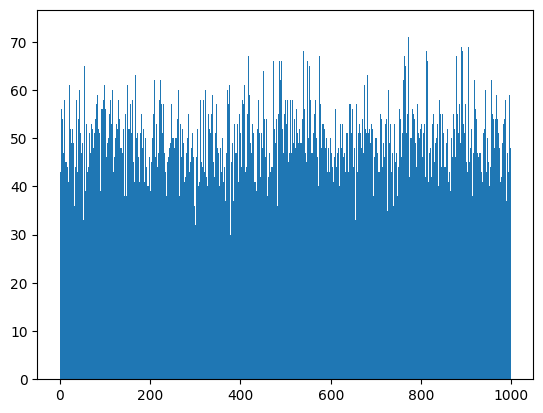

In [4]:
import random 
import matplotlib.pyplot as plt

def hybrid_verification():
    slots_num = 1000
    sample_times = 50000
    sample_results = []
    for i in range(sample_times):
        sample_results.append(random.randint(0, slots_num-1))
    # plot the histogram
    plt.hist(sample_results, bins=slots_num)
    plt.show()



    
hybrid_verification()

In [1]:
# method override test
class Base:
    def large_task(self):
        self.small_task()
    def small_task(self):
        print("Base::small_task")

class Derived(Base):
    def small_task(self):
        print("Derived::small_task")

base = Base()
base.large_task()

derived = Base()
derived.large_task()

Base::small_task
Base::small_task


In [ ]:
# test return type of operator=


In [3]:
# test multi process
from multiprocessing import Process, Pool
from time import sleep

def print_func(continent='Asia'):
    sleep(3)    
    print('The name of continent is : ', continent)

def test_simple_process():
    names = ['America', 'Europe', 'Africa']
    procs = []
    # instantiating process with arguments
    for name in names:
        # print(name)
        proc = Process(target=print_func, args=(name,))
        procs.append(proc)
        proc.start()
    print("hello")
    # complete the processes
    for proc in procs:
        proc.join()

def test_pool_map():
    names = ['America', 'Europe', 'Africa']
    with Pool(processes=3) as pool:
        pool.map(print_func, names)
    print('finished')

def test_pool_apply():
    names = ['America', 'Europe', 'Africa']
    with Pool(processes=3) as pool:
        [pool.apply(print_func, args=(name,)) for name in names]
    print('finished')

if __name__ == "__main__":  # confirms that the code is under main function
    # test_simple_process()
    # test_pool_map()
    test_pool_apply()



The name of continent is :  America
The name of continent is :  Europe
The name of continent is :  Africa
finished


In [13]:
import pandas as pd
import random

def parse_fct_multi_job(self, num_job:int):
    path = 'simulation/mix/rand_offset/fct_fat_llmTest_dcqcn_1.csv'
    fct_df = pd.read_csv(path)
    row_num = fct_df.shape[0]
    shuffled_row_num_li = list(range(row_num))
    random.shuffle(shuffled_row_num_li)
    num_flow_per_job = row_num // num_job
    job_id_colname = 'job_id'

    job_id_to_flow_ids = {}
    for job_id in range(num_job):
        job_id_to_flow_ids[job_id] = []
        for j in range(num_flow_per_job):
            shuffled_row_id = shuffled_row_num_li.pop()
            job_id_to_flow_ids[job_id].append(shuffled_row_id)
    for i in range(len(shuffled_row_num_li)):
        job_id_to_flow_ids[i].append(shuffled_row_num_li[i])

    # assign job id to each flow
    for job_id, flow_ids in job_id_to_flow_ids.items():
        fct_df.loc[flow_ids, job_id_colname] = job_id
    print(fct_df)

    # count rows by job id
    # job_id_to_row_num = fct_df.groupby(job_id_colname).size()
    # print(job_id_to_row_num)

    start_colname = "start(ns)" 
    complete_fct_colname = "complete_fct(ns)"
    end_colname = "end(ns)"

    groupped_df = fct_df.groupby('job_id')
    result = {
        'maxFctNs': groupped_df[complete_fct_colname].max(),
        'avgFctNs': groupped_df[complete_fct_colname].mean(),
        'makespanNs': groupped_df[end_colname].max() - groupped_df[start_colname].min(),
    }
    return result


parse_fct_multi_job(None, 20)

      src_ip    dst_ip  sport  dport  m_size(bytes)  start(ns)  \
0   0b001a01  0b003c01  10000    100      442622950    1000000   
1   0b000901  0b003c01  10000    100      442622950    1000000   
2   0b003501  0b003c01  10000    100      442622950    5000000   
3   0b001601  0b003c01  10000    100      442622950   18000000   
4   0b002301  0b003c01  10000    100      442622950   17000000   
..       ...       ...    ...    ...            ...        ...   
58  0b003601  0b003c01  10000    100      442622950  164000000   
59  0b001c01  0b003c01  10000    100      442622950  161000000   
60  0b000f01  0b003c01  10000    100      442622950  149000000   
61  0b000c01  0b003c01  10000    100      442622950  154000000   
62  0b002c01  0b003c01  10000    100      442622950  166000000   

    complete_fct(ns)  standalone_fct(ns)     end(ns)  job_id  
0         1880479023            37117708  1881479023    11.0  
1         1891040437            37117708  1892040437     1.0  
2         19328208